In [1]:
import numpy as np
import pandas as pd
import scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from mpl_toolkits import mplot3d
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('df_clean.csv', index_col='Name_Short')

In [3]:
df.head(2)

,Emax_amylase_2.75mcgml,Emax_glucosidase_0.67mcgml,IC50_amylase,IC50_glucosidase,Bioactivity_class_amylase,Bioactivity_class_glucosidase,Alkaloids,Antaquinones,Carotenoids,flavonoids,Reducing_sugars,Saponins,Tannins,Xanthones
Name_Short,,,,,,,,,,,,,,
G_cowa,99.6,51.1,0.13,0.63,active,active,0,0,0,0,0,2,2,2
P_debilis,99.5,50.0,0.14,0.72,active,active,3,0,0,5,3,0,0,0


In [4]:
indices = df.index

In [5]:
features = ['Alkaloids', 'Antaquinones', 'Carotenoids', 'flavonoids', 'Reducing_sugars', 'Saponins', 'Tannins', 'Xanthones']

In [6]:
x = df.loc[:, features].values

In [7]:
y = df.loc[:,['Bioactivity_class_amylase']].values

In [8]:
pd.DataFrame(data = x, columns = features, index=indices).head()

,Alkaloids,Antaquinones,Carotenoids,flavonoids,Reducing_sugars,Saponins,Tannins,Xanthones
Name_Short,,,,,,,,
G_cowa,0,0,0,0,0,2,2,2
P_debilis,3,0,0,5,3,0,0,0
P_evecta_leaf,0,0,0,3,0,3,2,0
P_evecta_Rhizome,3,0,0,5,3,0,0,5
E_cuneatum,3,0,0,2,0,3,3,0


In [9]:
pca = PCA(n_components=5)

In [10]:
principalComponents = pca.fit_transform(x)

In [11]:
pca.explained_variance_ratio_

array([0.31856466, 0.24071605, 0.19194758, 0.11693189, 0.08003695])

In [12]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'], index=indices)

In [13]:
principalDf.head(3)

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
Name_Short,,,,,
G_cowa,-1.137123,-0.471515,1.402216,2.333299,1.357207
P_debilis,3.983072,-0.668152,-1.706242,-0.865596,-1.605007
P_evecta_leaf,-1.180942,-0.583496,-0.853201,0.396442,-0.063465


In [14]:
Bioactivity_class_amylase = df[['Bioactivity_class_amylase']]

In [15]:
finalDf = pd.concat([principalDf, Bioactivity_class_amylase], axis = 1)
finalDf.head(3)

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,Bioactivity_class_amylase
Name_Short,,,,,,
G_cowa,-1.137123,-0.471515,1.402216,2.333299,1.357207,active
P_debilis,3.983072,-0.668152,-1.706242,-0.865596,-1.605007,active
P_evecta_leaf,-1.180942,-0.583496,-0.853201,0.396442,-0.063465,active


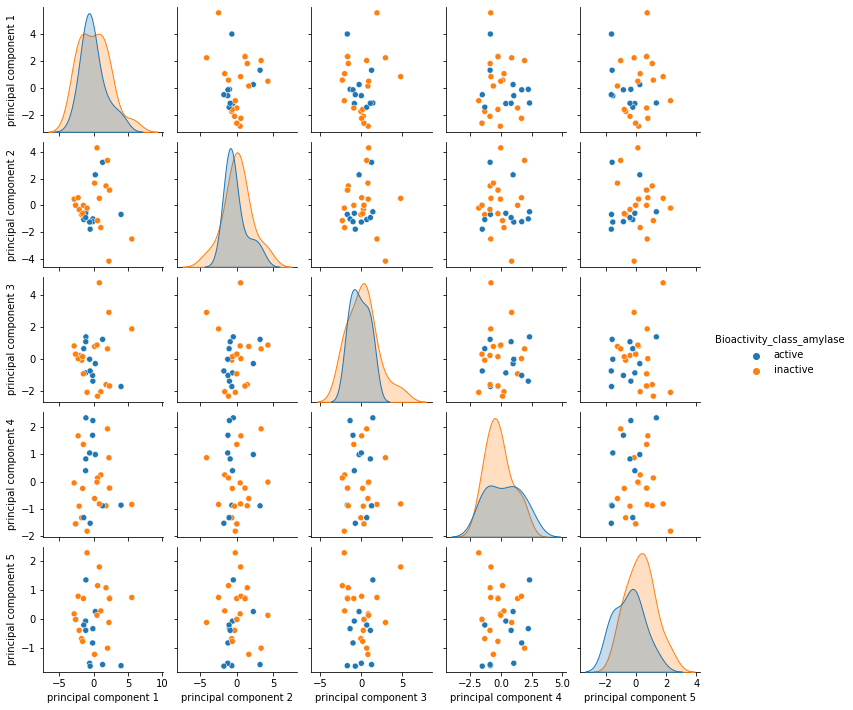

In [16]:
sns.pairplot(finalDf, hue="Bioactivity_class_amylase", height=2)
plt.savefig('PCA_pairplot_amylase.pdf', dpi=300)

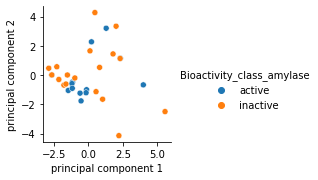

In [17]:
sns.pairplot(finalDf, x_vars=['principal component 1'], y_vars=['principal component 2'], hue="Bioactivity_class_amylase")

In [18]:
# Calculation of Explained Variance from the eigenvalues
tot = sum(pca.explained_variance_ratio_)
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_ratio_, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

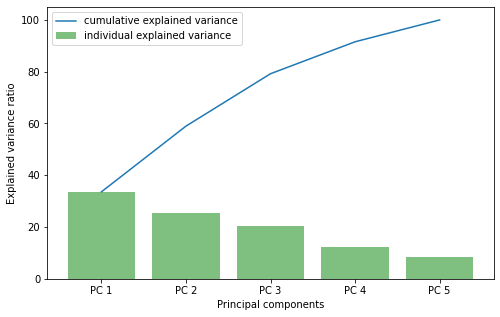

In [19]:
plt.figure(figsize=(8, 5))
plt.bar(range(5), var_exp, alpha=0.5, align='center', label='individual explained variance', color = 'g')
plt.plot(range(5), cum_var_exp,label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(range(0,5),
           ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5'], rotation=0)
plt.legend(loc='best')
plt.savefig('PCA_explained_variance.pdf', dpi=300)
plt.show()

In [20]:
SumExplained = pd.DataFrame(cum_var_exp, columns=['PC'], index=['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5'])
SumExplained

,PC
PC 1,33.596880
PC 2,58.983589
PC 3,79.227015
PC 4,91.559039
PC 5,100.000000


# 3D

In [39]:
LABEL_COLOR_MAP = {'active' : 'blue','inactive' : 'orange'}
label_color = [LABEL_COLOR_MAP[l] for l in finalDf['Bioactivity_class_amylase']]

KeyError: 'Bioactivity_class_amylase'

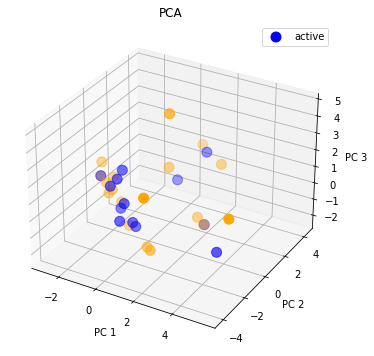

In [22]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(finalDf['principal component 1'], finalDf['principal component 2'], finalDf['principal component 3'], c=label_color, s=100)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.legend(LABEL_COLOR_MAP)
ax.set_title('PCA')
plt.savefig('PCA_3D_amylase.pdf', dpi=300)
plt.show()

In [23]:
x = df.loc[:, features].values

In [25]:
y = df.loc[:,['Bioactivity_class_glucosidase']].values

In [26]:
pca = PCA(n_components=5)

In [27]:
principalComponents = pca.fit_transform(x)

In [28]:
pca.explained_variance_ratio_

array([0.31856466, 0.24071605, 0.19194758, 0.11693189, 0.08003695])

In [29]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'], index=indices)

In [30]:
Bioactivity_class_glucosidase = df[['Bioactivity_class_glucosidase']]

In [31]:
finalDf = pd.concat([principalDf, Bioactivity_class_glucosidase], axis = 1)
finalDf.head(3)

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,Bioactivity_class_glucosidase
Name_Short,,,,,,
G_cowa,-1.137123,-0.471515,1.402216,2.333299,1.357207,active
P_debilis,3.983072,-0.668152,-1.706242,-0.865596,-1.605007,active
P_evecta_leaf,-1.180942,-0.583496,-0.853201,0.396442,-0.063465,active


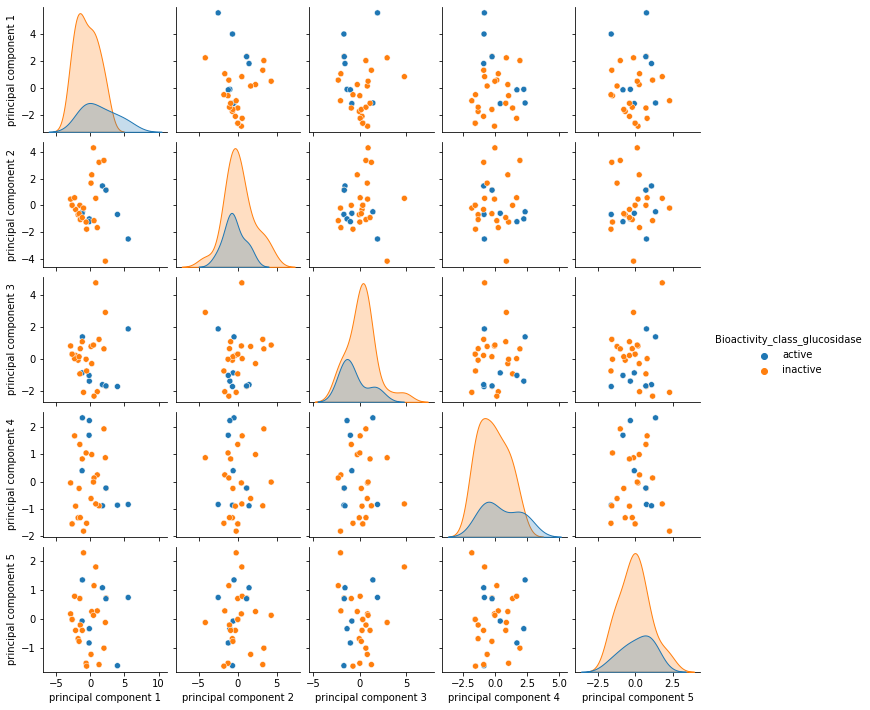

In [35]:
sns.pairplot(finalDf, hue="Bioactivity_class_glucosidase", height=2)
plt.savefig('PCA_pairplot_glucosidase.pdf', dpi=300)

In [36]:
LABEL_COLOR_MAP = {'active' : 'blue','inactive' : 'orange'}
label_color = [LABEL_COLOR_MAP[l] for l in finalDf['Bioactivity_class_glucosidase']]

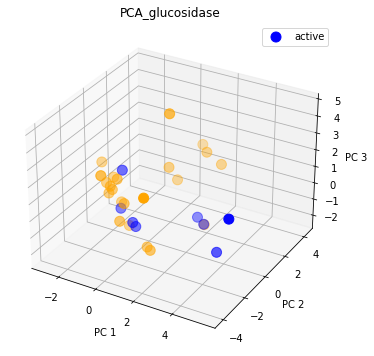

In [38]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(finalDf['principal component 1'], finalDf['principal component 2'], finalDf['principal component 3'], c=label_color, s=100)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.legend(LABEL_COLOR_MAP)
ax.set_title('PCA_glucosidase')
plt.savefig('PCA_3D_glucosidase.pdf', dpi=300)
plt.show()